In [1]:
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
import ast

# Load data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Cleaning data
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [2]:
# Only get data analyst jobs in the US
df_DA_US = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'United States')].copy()

# Drop NaN values from the salary_year_avg column for accurate visualization
df_DA_US = df_DA_US.dropna(subset=['salary_year_avg'])

In [4]:
df_DA_US = df_DA_US.explode('job_skills')

df_DA_US[['salary_year_avg', 'job_skills']]

,salary_year_avg,job_skills
109,89000.0,python
109,89000.0,r
109,89000.0,alteryx
109,89000.0,tableau
180,90250.0,excel
...,...,...
784882,87500.0,sql
784882,87500.0,vba
784882,87500.0,tableau
784882,87500.0,excel


In [15]:
df_DA_US_group = df_DA_US.groupby('job_skills')['salary_year_avg'].agg(['count', 'median'])

df_DA_top_pay = df_DA_US_group.sort_values(by='median', ascending=False).head(10)

df_DA_skills = df_DA_US_group.sort_values(by='count', ascending=False).head(10).sort_values(by='median', ascending=False).head(10)

(0.0, 206062.5)

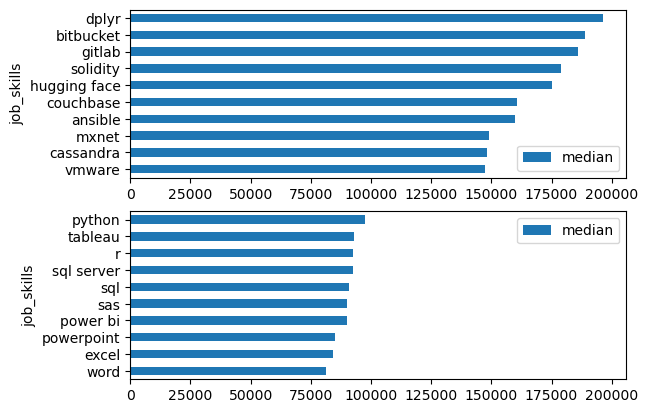

In [ ]:
fig, ax = plt.subplots(2, 1)

df_DA_top_pay[::-1].plot(kind='barh', y='median', ax=ax[0]) # another method to invert the data is to use [::-1] stating that we are trying to get data in reverse.
# ax[0].invert_yaxis()

df_DA_skills[::-1].plot(kind='barh', y='median', ax=ax[1])
ax[1].set_xlim(ax[0].get_xlim())  # another method to use ax variable and get the limit for x value.

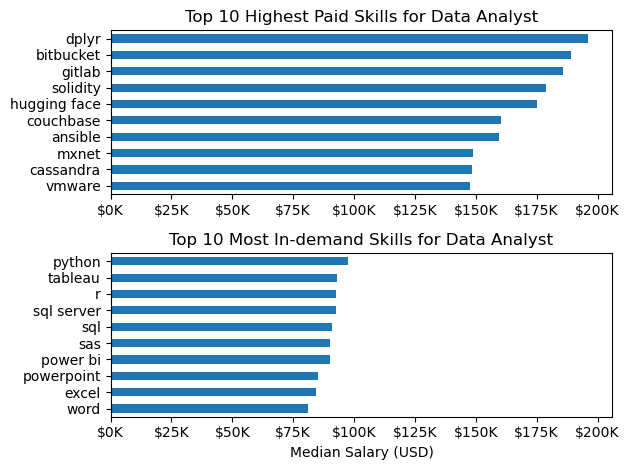

In [22]:
fig, ax = plt.subplots(2, 1)

df_DA_top_pay[::-1].plot(kind='barh', y='median', ax=ax[0], legend=False) 
ax[0].set_title('Top 10 Highest Paid Skills for Data Analyst')
ax[0].set_ylabel('')
ax[0].set_xlabel('')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))
# ax[0].invert_yaxis()

df_DA_skills[::-1].plot(kind='barh', y='median', ax=ax[1], legend=False)
ax[1].set_xlim(ax[0].get_xlim())  # another method to use ax variable and get the limit for x value.
ax[1].set_title('Top 10 Most In-demand Skills for Data Analyst')
ax[1].set_ylabel('')
ax[1].set_xlabel('Median Salary (USD)')
ax[1].set_xlim(ax[0].get_xlim())
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))

fig.tight_layout() # To remove overlap.

In [35]:
df_DE_IN = df[(df['job_title_short'] == 'Data Engineer') & (df['job_country'] == 'India')].copy()

df_DE_IN = df_DE_IN.dropna(subset=['salary_year_avg'])

In [36]:
df_DE_IN = df_DE_IN.explode('job_skills')

df_DE_IN[['salary_year_avg', 'job_skills']]

,salary_year_avg,job_skills
2022,156500.0,java
2022,156500.0,t-sql
2022,156500.0,sql
2022,156500.0,azure
2022,156500.0,power bi
...,...,...
785395,64800.0,databricks
785395,64800.0,spark
785395,64800.0,power bi
785395,64800.0,tableau


In [38]:
df_DE_group = df_DE_IN.groupby('job_skills')['salary_year_avg'].agg(['count', 'median'])

df_DE_top_pay = df_DE_group.sort_values(by='median', ascending=False).head(10)

df_DE_skills = df_DE_group.sort_values(by='count', ascending=False).head(10).sort_values(by='median', ascending=False).head(10)

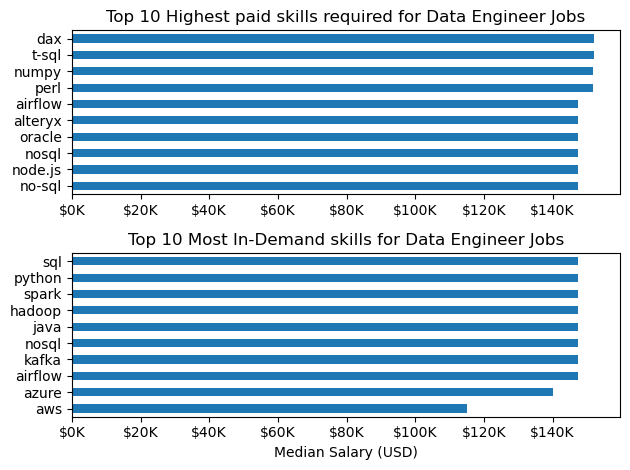

In [41]:
fig, ax = plt.subplots(2,1)

df_DE_top_pay[::-1].plot(kind='barh', y='median', ax=ax[0], legend=False)
ax[0].set_title('Top 10 Highest paid skills required for Data Engineer Jobs')
ax[0].set_ylabel('')
ax[0].set_xlabel('')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))

df_DE_skills[::-1].plot(kind='barh', y='median', ax=ax[1], legend=False)
ax[1].set_title('Top 10 Most In-Demand skills for Data Engineer Jobs')
ax[1].set_ylabel('')
ax[1].set_xlabel('Median Salary (USD)')
ax[1].set_xlim(ax[0].get_xlim())
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))

fig.tight_layout() # To remove overlap.